## Import necessary libraries

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
import ndreg
from ndreg import preprocessor, registerer
import SimpleITK as sitk
import numpy as np

### Load the sample data

In [3]:
img = ndreg.imgRead('sample.png')

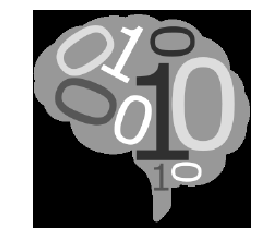

In [4]:
plt.imshow(sitk.GetArrayViewFromImage(img), cmap='gray')
plt.axis('off')
plt.show()

### Load the sample transformed image

In [5]:
img_transformed = ndreg.imgRead('sample_transformed.png')

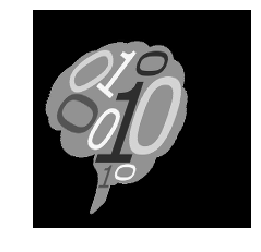

In [6]:
plt.imshow(sitk.GetArrayFromImage(img_transformed), cmap='gray')
plt.axis('off')
plt.show()

### Registration
We want to obtain the parameters to transform the original image to the new image. The transformation from the original image to the new image can be described as an affine transformation which can parametrize a transformation that contains translation, scaling, rotation, and shear. 

In [7]:
final_transform = registerer.register_affine(img, img_transformed, learning_rate=4.0)

## Apply computed transform to original image

In [8]:
corrected_img = registerer.resample(img, final_transform, img_transformed)

## Visualize registered image

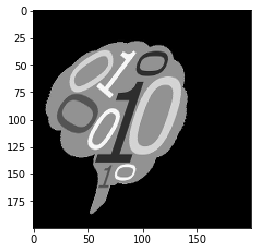

In [9]:
plt.imshow(sitk.GetArrayViewFromImage(corrected_img), cmap='gray')
plt.show()

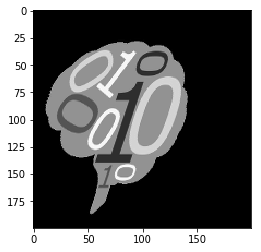

In [10]:
plt.imshow(sitk.GetArrayViewFromImage(img_transformed), cmap='gray')
plt.show()